In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import wordcloud
import nltk

In [2]:
TO_SHOW = 20 #how many words will be shown on the bar graph

In [3]:
#get the keys of a dictionary sorted by their values, return only keys
def sort_by_values(input_dict):
    items = input_dict.items()
    backwards = [(value, key) for (key, value) in items]
    backwards.sort(reverse=True)
    sorted_keys = [key for (value, key) in backwards]
    return sorted_keys

In [4]:
#remove every tuple from a list of tuples if any word in a list of words appears in it
def remove_words(tuple_list, wordlist):
    for word in wordlist:
        tuple_list = [word_tuple for word_tuple in tuple_list if word not in word_tuple]
    return tuple_list

In [5]:
#load word data
df = pd.read_csv('words.csv')
words = list(df['word'])[:TO_SHOW]
wanted_columns = [item for item in df.columns.values if item not in ['word', 'definition']] #columns in df with wanted data

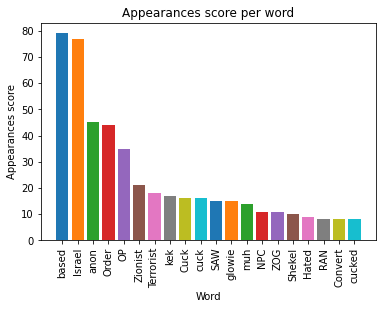

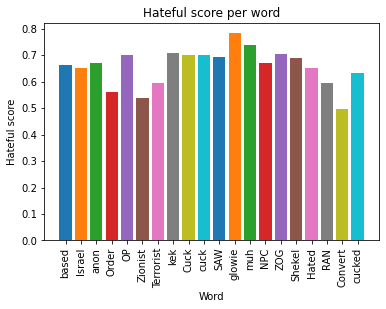

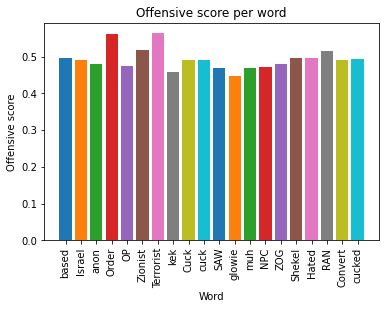

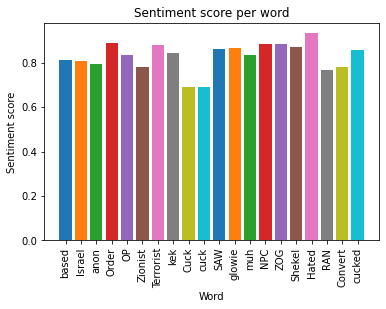

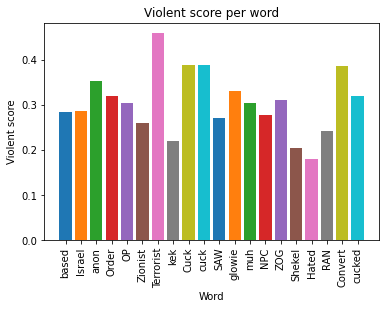

In [6]:
#make bar graphs of most frequent words for each of the wanted columns
for wanted_column in wanted_columns:
    plt.figure()
    title = wanted_column.title()
    for i, word in enumerate(words):
        plt.bar(word, df.loc[i, wanted_column].item())
    plt.xlabel('Word')
    plt.ylabel(f'{title} score')
    plt.title(f'{title} score per word') 
    ax = plt.gca()
    ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(range(len(words))))
    ax.set_xticklabels(labels=words,rotation=90)
    plt.show()

In [7]:
#load raw (full response) data
df = pd.read_csv('cleaned_data.csv')
df['date'] = pd.to_datetime(df['date'])

#appearances isn't a 0-1 score like the others, so get rid of it for this part
score_columns = [item for item in wanted_columns if item != 'appearances'] 

In [8]:
#get list of times
time = list(df['date'])
time.reverse()

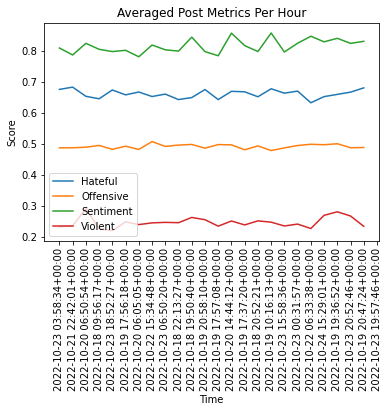

In [9]:
#make score visualizations over time
plt.figure()
for wanted_column in score_columns:
    temp_df = df.groupby(df['date'].dt.hour).mean()
    plt.plot(temp_df[wanted_column], label=wanted_column.title())
    plt.ylabel('Score')
    plt.xlabel('Time')
    plt.title('Averaged Post Metrics Per Hour')
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(range(len(time[::100]))))
ax.set_xticklabels(labels=time[::100], rotation=90)
plt.legend()
plt.show()

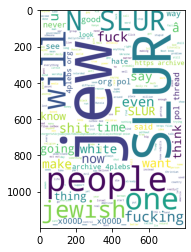

In [10]:
#make wordcloud with text
text = ' '.join(list(df['text']))
wc = wordcloud.WordCloud(
    background_color = 'white',
    stopwords = wordcloud.STOPWORDS,
    height = 1200,
    width = 800)
wc.generate(text)
plt.imshow(wc)

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicoc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#get bigrams in text
tokens = nltk.word_tokenize(text)
bigrams = nltk.bigrams(tokens)
frequency = nltk.FreqDist(bigrams)
words = sort_by_values(frequency) #sort by frequency values
words = remove_words(words, '.,:!?"><`()') #remove punctuation
words = remove_words(words, wordcloud.STOPWORDS) #remove common words (the, a, etc.)
print(words[:TO_SHOW*5])

[('K-SLUR', 'K-SLUR'), ('I', "'m"), ('It', "'s"), ('ca', "n't"), ('_x000D_', '_x000D_'), ('ect', 'ect'), ('â€', '“'), ('Must-know', 'redpills'), ('expand', '...'), ("''", "''"), ('wo', "n't"), ('That', "'s"), ('*', '*'), ('I', "'ve"), ("n't", 'even'), ('You', "'re"), ('View', 'attachment'), ('He', "'s"), ('100', '%'), ('...', "''"), ('I', 'know'), ('--', '--'), ('slave', 'trade'), ('tranny', 'agenda'), ('I', 'think'), ('gon', 'na'), ('Weimar', 'Germany'), ('fucking', 'K-SLUR'), ('will', 'never'), ('jew', 'redpills'), ("n't", 'know'), ('every', 'single'), ('The', 'jew'), ('white', 'people'), ('right', 'now'), ('later', 'reference'), ('jews', 'NOW'), ('REDPILL', 'NORMIES'), ('Kanye', 'West'), ('=', '='), ('fucking', 'jew'), ('_x000D_', 'https'), ('_x000D_', '['), ('I', 'will'), ('General', 'jew'), ('Oct', '2022'), ('I', "'d"), ('lifetime', '...'), ('I', 'hate'), ('I', 'ca'), ('...', 'REDPILL'), ("''", 'Click'), ('top', '235'), ('I', 'see'), ('Do', "n't"), ('posts', '-'), ('goatpen', 'par